## 2.1 Wildlife dataset

- WildlifeDataset is a class for creating pytorch style datasets by integration of datasets provided by wildlife-datasets library.

- central part of WildlifeDataset is metadata dataframe, which includes all

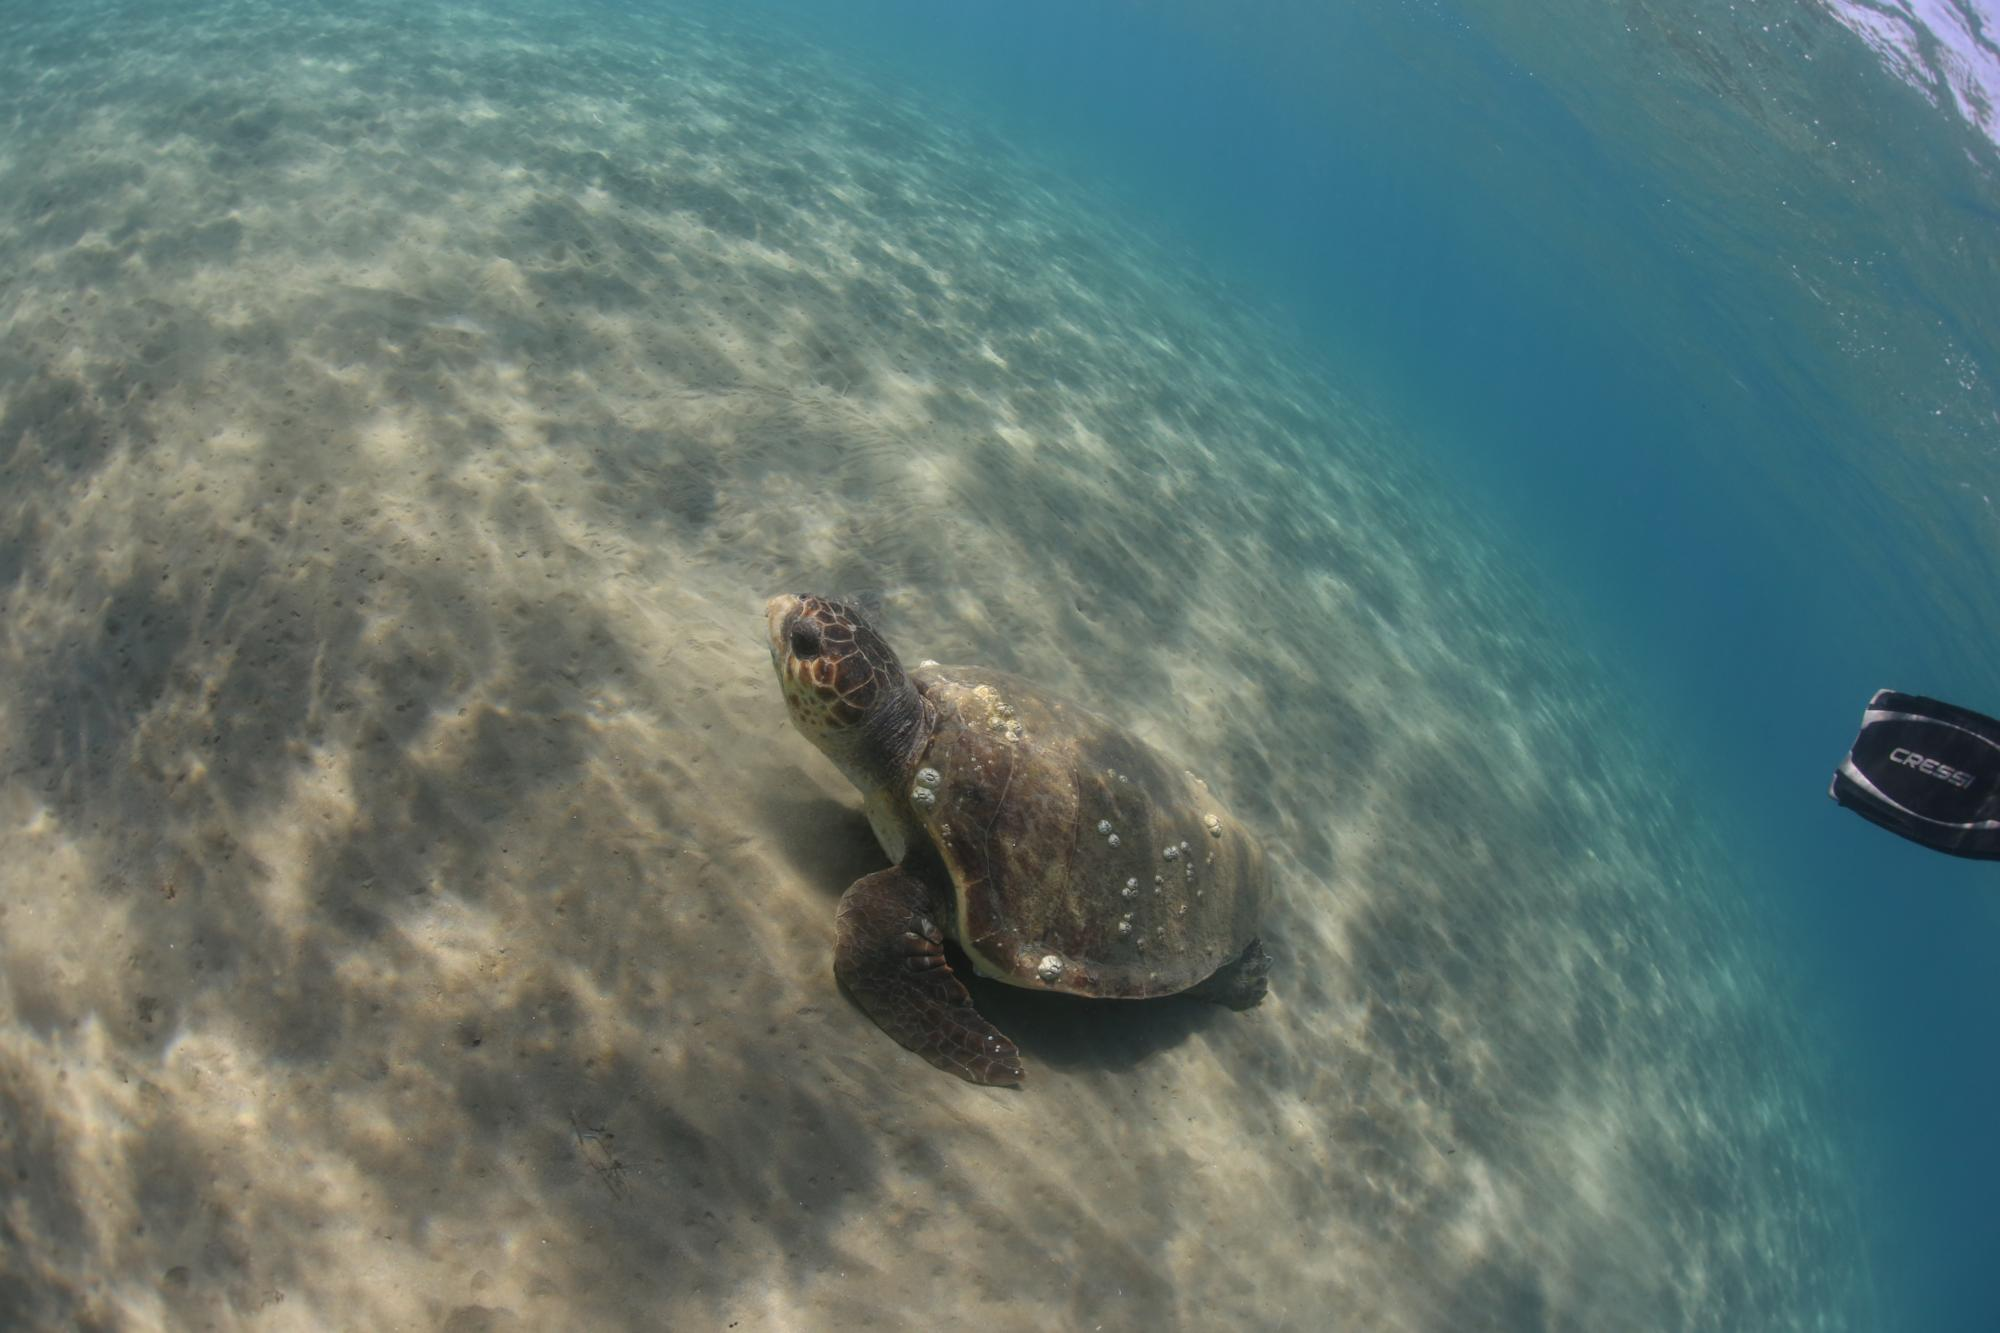

In [16]:
from wildlife_tools.data.dataset import WildlifeDataset
import pandas as pd

metadata = pd.read_csv('SampleDataset/metadata.csv')
dataset = WildlifeDataset(metadata, 'SampleDataset')
x, y = dataset[0]
x

# 1. Split
- Split represents subset of dataset.


In [1]:
from tools import realize
import pandas as pd

metadata = pd.DataFrame([
    [1, 'test',  'A'],
    [2, 'train', 'A'],
    [3, 'test',  'B'],
    [4, 'train', 'B'],
    [5, 'test',  'C'],
    [6, 'train', 'C'],
    ],
    columns=['id', 'split', 'identity']
)

## 1.1 Split to chunks
- Deterministically splits to equally sized chunks. Usefull for splitting the dataset to paralellize computationsally heavy tasks.

In [2]:
split_config = {
    'method': 'SplitChunk',
    'chunk': 2,
    'chunk_total': 3
}
split = realize(split_config)
split(metadata)

,id,split,identity
2,3,test,B
3,4,train,B


## 1.2 Split  based on metadata
- Split based on column in metadata (eg. train / test in split column)

In [3]:
split_config = {
    'method': 'SplitMetadata',
    'col': 'split',
    'value': 'test',
}
split = realize(split_config)
split(metadata)

,id,split,identity
0,1,test,A
2,3,test,B
4,5,test,C


## 1.3 Split using wildlife-datasets splits

In [2]:
split_config = {
    'method': 'SplitWildlife',
    'split': 'test',
    'splitter': {
        'method': 'closed',
        'seed': 1,
        'ratio_train': 0.7
        }
}
split = realize(split_config)
split(metadata)

,id,split,identity
0,1,test,A
3,4,train,B
4,5,test,C


## 1.4 Split pipeline
- Multiple splits chained in succession. Usefull for splitting data to both train set and to chunks.

In [14]:
split_config = {
    'method': 'SplitPipeline',
    'steps': [
    {
        'method': 'SplitMetadata',
        'col': 'split',
        'value': 'test',
    },{
        'method': 'SplitChunk',
        'chunk': 2,
        'chunk_total': 3
    }
]}

split = realize(split_config)
split(metadata)

,id,split,identity
2,3,test,B


In [ ]:
SplitMetadata(col='split', value='test')


In [5]:
# Raise if component is not split
split_config = {
    'method': 'SplitPipeline',
    'steps': [
    {
        'method': 'TransformTimm',
        'input_size': 224,
        'is_training': True,
        'auto_augment': 'rand-m10-n2-mstd1',
    }
]}

try:
    split = realize(split_config)
    split(metadata)

except ValueError as e:
    print(e)

One of the steps is not Split component.


# 2. Datasets

In [13]:
config = {
    'method': 'WildlifeDataset',
    'metadata': 'examples/SampleDataset/metadata.csv',
    'root': 'examples/SampleDataset',

    'transform': {
        'method': 'TransformTorchvision',
        'compose': [
            'Resize(224)',
            'ToTensor()'
        ],
    },

    'split': {
        'method': 'SplitChunk',
        'chunk': 1,
        'chunk_total': 2,
    },
}
dataset = realize(config)
x, y = dataset[0]

WildlifeDataset(
    transform=TransformTorchvision(),
)

## 2.2 Feature dataset
- In memory dataset with features.

# 3. Transforms

## 3.1 TIMM Transforms
- Gives arguments to timm.data.transforms_factory.create_transform.

In [6]:
from data import transform_store

config = {
    'method': 'TransformTimm',
    'input_size': 224,
    'is_training': True,
    'auto_augment': 'rand-m10-n2-mstd1',
}
transform = realize(config)
transform

TransformTimm


Compose(
    RandomResizedCropAndInterpolation(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
    RandomHorizontalFlip(p=0.5)
    RandAugment(n=2, ops=
	AugmentOp(name=AutoContrast, p=0.5, m=10, mstd=1.0)
	AugmentOp(name=Equalize, p=0.5, m=10, mstd=1.0)
	AugmentOp(name=Invert, p=0.5, m=10, mstd=1.0)
	AugmentOp(name=Rotate, p=0.5, m=10, mstd=1.0)
	AugmentOp(name=Posterize, p=0.5, m=10, mstd=1.0)
	AugmentOp(name=Solarize, p=0.5, m=10, mstd=1.0)
	AugmentOp(name=SolarizeAdd, p=0.5, m=10, mstd=1.0)
	AugmentOp(name=Color, p=0.5, m=10, mstd=1.0)
	AugmentOp(name=Contrast, p=0.5, m=10, mstd=1.0)
	AugmentOp(name=Brightness, p=0.5, m=10, mstd=1.0)
	AugmentOp(name=Sharpness, p=0.5, m=10, mstd=1.0)
	AugmentOp(name=ShearX, p=0.5, m=10, mstd=1.0)
	AugmentOp(name=ShearY, p=0.5, m=10, mstd=1.0)
	AugmentOp(name=TranslateXRel, p=0.5, m=10, mstd=1.0)
	AugmentOp(name=TranslateYRel, p=0.5, m=10, mstd=1.0))
    ToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]),

## 3.2 Torchvision Transforms
- Build transform pipelines using torchvision.transform Compose.

In [7]:
config = {
    'method': 'TransformTorchvision',
    'compose': [
        'Resize(size=256)',
        'ToTensor()',
    ]
}
transform = realize(config)
transform

TransformTorchvision


Compose(
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
)

# Yaml parser
- Utilizes Jinja to parse variables.


In [8]:
from tools import parse_yaml

In [9]:
# No impute

yaml_string = """
pipeline1:
  method: SplitChunk
  chunk: 2
  chunk_total: 3
"""


parse_yaml(yaml_string)

{'pipeline1': {'method': 'SplitChunk', 'chunk': 2, 'chunk_total': 3}}

In [10]:
# Multiple imputes

yaml_string = """
pipeline1:
  method: SplitChunk
  chunk: 2
  chunk_total: 3

pipeline2:
  method: SplitPipeline
  steps:
  - "{{pipeline1}}"

pipeline3:
  method: SplitPipeline
  steps:
  - "{{pipeline2}}"

"""


parse_yaml(yaml_string)

{'pipeline1': {'method': 'SplitChunk', 'chunk': 2, 'chunk_total': 3},
 'pipeline2': {'method': 'SplitPipeline',
  'steps': [{'method': 'SplitChunk', 'chunk': 2, 'chunk_total': 3}]},
 'pipeline3': {'method': 'SplitPipeline',
  'steps': [{'method': 'SplitPipeline',
    'steps': [{'method': 'SplitChunk', 'chunk': 2, 'chunk_total': 3}]}]}}

In [11]:
# Error if circular impute:
yaml_string = """
pipeline3:
  method: SplitPipeline
  steps:
  - "{{pipeline3}}"

"""

try:
    parse_yaml(yaml_string)
except ValueError as e:
    print(e)

Unable to impute variables in all places: {'pipeline3'}


In [12]:
    yaml_string = """
    a:
        name: test
    b:
        uses: "{{a}}"
    """
    parse_yaml(yaml_string)

{'a': {'name': 'test'}, 'b': {'uses': {'name': 'test'}}}